In [25]:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
#set_config(transform_output = "pandas")

In [26]:
#conda install --channel=conda-forge scikit-learn

## Function to Save Figures

In [27]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [28]:
# Import train and test sets
X_train = pd.read_csv('ScaledTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [29]:
X_train.columns


Index(['blood_pressure', 'cholesterol', 'max_heart_rate', 'age', 'sex',
       'chest_pain_type', 'fasting_blood_sugar', 'restecg',
       'exercise_induced_angina', 'oldpeak', 'slope', 'output'],
      dtype='object')

## baseline classifier 0 R

In [30]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'output')
y = X_train['output']

In [31]:
xt = X_test

In [32]:
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

### 0r classifier accuray

In [33]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['output'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['output'], 
                                      dummy.predict(xt)))

Train Accuracy 0.523109243697479
Test Accuracy 0.5504201680672269


In [34]:
# Separate target from dataset
y_train = X_train['output']
X_train = X_train[['blood_pressure', 'cholesterol', 'max_heart_rate', 'age', 'sex',
       'chest_pain_type', 'fasting_blood_sugar', 'restecg',
       'exercise_induced_angina', 'oldpeak', 'slope'
       ]]
                   #'avg_grade']]
#[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y_test = X_test['output']
X_test = X_test[['blood_pressure', 'cholesterol', 'max_heart_rate', 'age', 'sex',
        'chest_pain_type', 'fasting_blood_sugar', 'restecg',
        'exercise_induced_angina', 'oldpeak', 'slope'
        ]]
                    #'avg_grade']]



In [35]:
y_train

0      1.0
1      0.0
2      1.0
3      1.0
4      0.0
      ... 
947    1.0
948    0.0
949    1.0
950    1.0
951    0.0
Name: output, Length: 952, dtype: float64

## Finding suitable value of k for KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

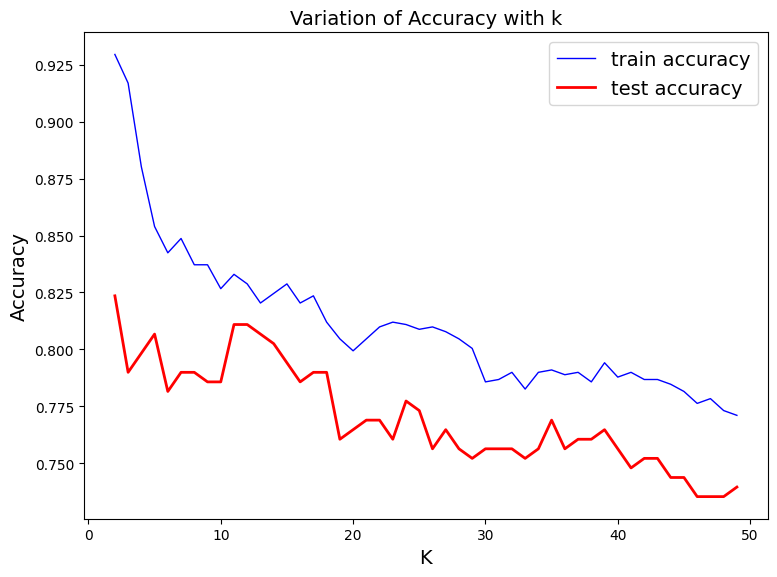

In [37]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [39]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

,K,Train Acc,Test Acc
0,2,0.929622,0.823529
1,3,0.917017,0.789916
2,4,0.880252,0.798319
3,5,0.853992,0.806723
4,6,0.842437,0.781513
5,7,0.848739,0.789916
6,8,0.837185,0.789916
7,9,0.837185,0.785714
8,10,0.826681,0.785714
9,11,0.832983,0.810924


## Applying suitable value of k in KNN Classifier

In [40]:
best_grid_knn= KNeighborsClassifier(n_neighbors=7)
best_grid_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### Train Set

[[363  91]
 [ 53 445]]
Accuracy Score 0.8487394957983193
              precision    recall  f1-score   support

         0.0     0.8726    0.7996    0.8345       454
         1.0     0.8302    0.8936    0.8607       498

    accuracy                         0.8487       952
   macro avg     0.8514    0.8466    0.8476       952
weighted avg     0.8504    0.8487    0.8482       952



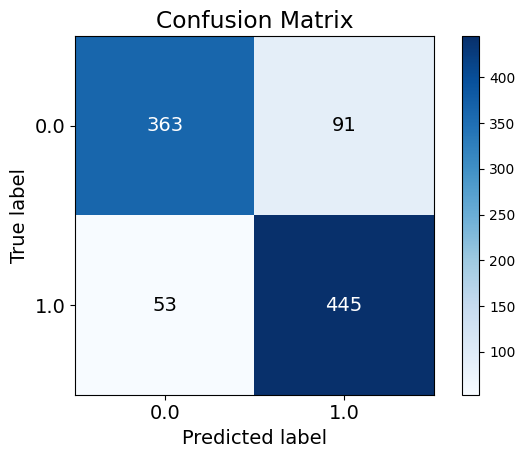

In [41]:
y_pred=best_grid_knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for KNN hyper-para tuned')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print(classification_report(y_train,y_pred, digits=4))

### Test Set

[[ 80  27]
 [ 23 108]]
Accuracy Score 0.7899159663865546
Classification report: 
              precision    recall  f1-score   support

         0.0     0.7767    0.7477    0.7619       107
         1.0     0.8000    0.8244    0.8120       131

    accuracy                         0.7899       238
   macro avg     0.7883    0.7860    0.7870       238
weighted avg     0.7895    0.7899    0.7895       238



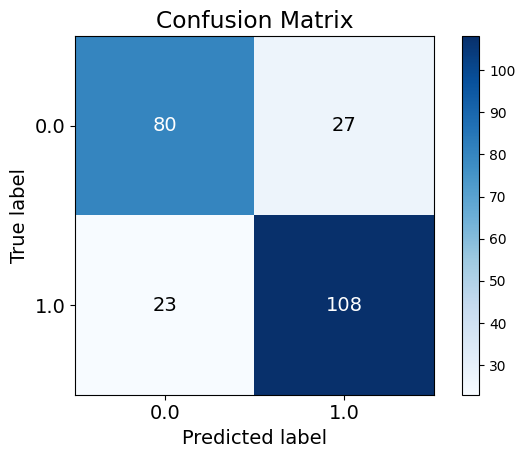

In [42]:
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for KNN hyper-para tuned')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred, digits=4)))

In [43]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,80,27
1,23,108


In [44]:
# !pip install scikit-plot


import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.7899159663865546


## Hyperparameter Tuning on Decision Tree

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [46]:
param_grid = {
    'criterion' : ['gini'],
    'splitter' : ['best'],
    'max_depth' : range(2,4),
}

In [47]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(2, 4),
                         'splitter': ['best']},
             verbose=2)

In [48]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(max_depth=3)

## Appying best estimators on Decision Tree

[[ 91  16]
 [ 22 109]]


Accuracy Score 0.8403361344537815
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       107
         1.0       0.87      0.83      0.85       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



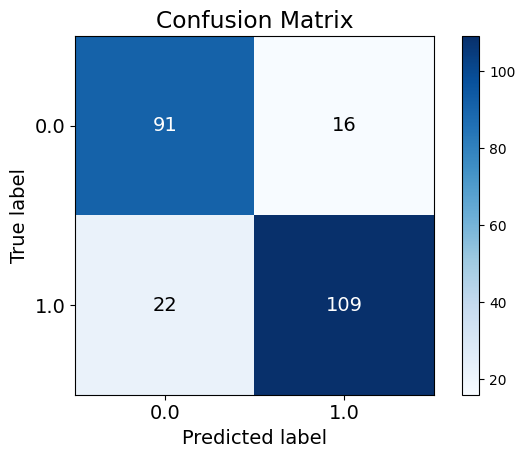

In [49]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

Max Depth =  1 , Train Acc. =  0.786 , Test Acc. =  0.782
Max Depth =  2 , Train Acc. =  0.786 , Test Acc. =  0.782
Max Depth =  3 , Train Acc. =  0.833 , Test Acc. =  0.84
Max Depth =  4 , Train Acc. =  0.838 , Test Acc. =  0.853
Max Depth =  5 , Train Acc. =  0.882 , Test Acc. =  0.845
Max Depth =  6 , Train Acc. =  0.919 , Test Acc. =  0.87
Max Depth =  7 , Train Acc. =  0.943 , Test Acc. =  0.887
Max Depth =  8 , Train Acc. =  0.968 , Test Acc. =  0.895
Max Depth =  9 , Train Acc. =  0.982 , Test Acc. =  0.899
Max Depth =  10 , Train Acc. =  0.991 , Test Acc. =  0.903
Max Depth =  11 , Train Acc. =  0.993 , Test Acc. =  0.895
Max Depth =  12 , Train Acc. =  0.997 , Test Acc. =  0.895
Max Depth =  13 , Train Acc. =  0.999 , Test Acc. =  0.891
Max Depth =  14 , Train Acc. =  1.0 , Test Acc. =  0.891
Max Depth =  15 , Train Acc. =  1.0 , Test Acc. =  0.912
Max Depth =  16 , Train Acc. =  1.0 , Test Acc. =  0.912
Max Depth =  17 , Train Acc. =  1.0 , Test Acc. =  0.895
Max Depth =  18 

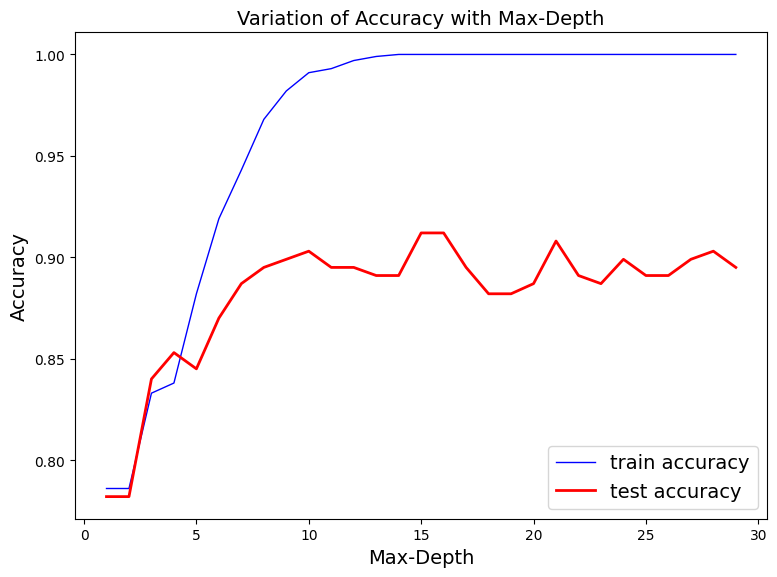

In [50]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth, criterion='gini')
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

Confusion Matrix for Train Set


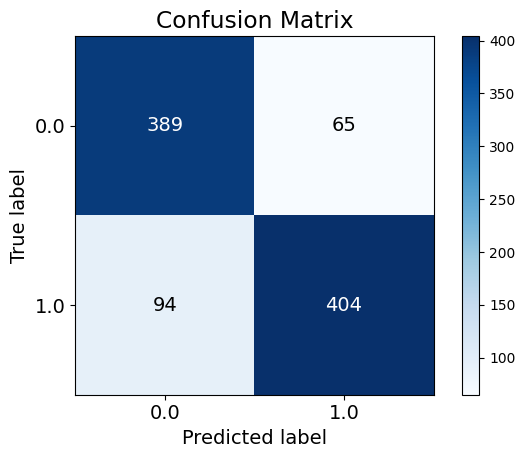

In [51]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
y_pred = best_grid_dt.predict(X_train)
pd. DataFrame (confusion_matrix(y_train, y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')

In [52]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))


Confusion Matrix for Test Set


,0,1
0,91,16
1,22,109


In [53]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))
print("Accuracy Score {}".format(accuracy_score(y_train,best_grid_dt.predict(X_train))))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       454
         1.0       0.86      0.81      0.84       498

    accuracy                           0.83       952
   macro avg       0.83      0.83      0.83       952
weighted avg       0.83      0.83      0.83       952

Accuracy Score 0.832983193277311


In [54]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))
print("Accuracy Score {}".format(accuracy_score(y_test,best_grid_dt.predict(X_test))))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       107
         1.0       0.87      0.83      0.85       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

Accuracy Score 0.8403361344537815


## Hyperparameter Tuning on Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [57]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [ ]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='log_loss', n_estimators=500)

In [ ]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='log_loss', n_estimators=500)

### Train Set

[[454   0]
 [  0 498]]
Accuracy Score 1.0
Classification report: 
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000       454
         1.0      1.000     1.000     1.000       498

    accuracy                          1.000       952
   macro avg      1.000     1.000     1.000       952
weighted avg      1.000     1.000     1.000       952



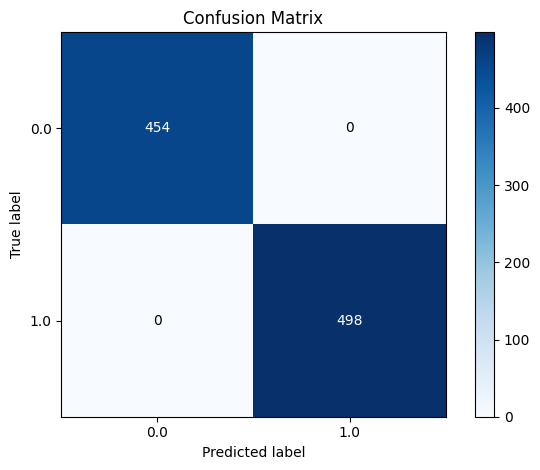

In [ ]:
y_pred=best_grid_rf.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred, cmap='Blues');
save_fig('Train Set Confusion Matrix for Random Forest hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred,digits=3)))

### Test Set

In [ ]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred,digits=3)))

[[100   7]
 [  4 127]]
Accuracy Score 0.9537815126050421
Classification report: 
              precision    recall  f1-score   support

         0.0      0.962     0.935     0.948       107
         1.0      0.948     0.969     0.958       131

    accuracy                          0.954       238
   macro avg      0.955     0.952     0.953       238
weighted avg      0.954     0.954     0.954       238



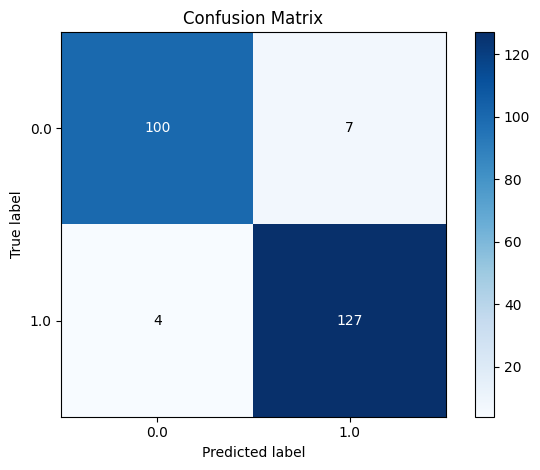

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Random forest hyper-para tuned q2')

## Hyperparameter Tuning on Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [60]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
350 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [61]:
# Finding out the best estimator
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty=None, solver='sag')

In [62]:
y_probas = best_grid_rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro = False, plot_macro = False)
save_fig('ROC Curve-Random Forest Q2')
plt.show();

NameError: name 'best_grid_rf' is not defined

# Applying the best grid for logistic regression

In [63]:
best_grid_lr.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

### Train Set

[[371  83]
 [ 78 420]]
Accuracy Score 0.8308823529411765
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       454
         1.0       0.83      0.84      0.84       498

    accuracy                           0.83       952
   macro avg       0.83      0.83      0.83       952
weighted avg       0.83      0.83      0.83       952



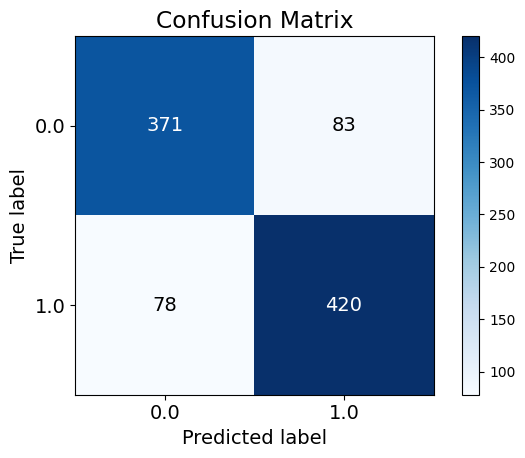

In [64]:
y_pred=best_grid_lr.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

[[ 91  16]
 [ 18 113]]


Accuracy Score 0.8571428571428571
Classification report: 
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       107
         1.0       0.88      0.86      0.87       131

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238



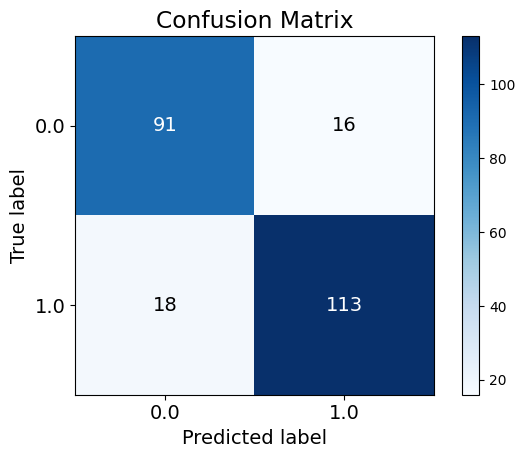

In [65]:
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [66]:
from sklearn.svm import SVC

In [67]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'break_ties' : [True, False]
}

In [68]:
#svc_grid = SVC()
#grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
#grid_search_svc.fit(X_train,y_train)

In [69]:
#best_grid_svc = grid_search_svc.best_estimator_
#best_grid_svc

# Applying the best grid for SVM

In [70]:
#best_grid_svc.fit(X_train, y_train)

### Train Set

In [71]:
#y_pred=best_grid_svc.predict(X_train)
#print(confusion_matrix(y_train,y_pred))
#skplt.metrics.plot_confusion_matrix(y_train, y_pred);
#save_fig('Train Set Confusion Matrix for SVM hyper-para tuned q2')
#print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
#print("Classification report: \n{}".format(classification_report(y_train,y_pred)))

### Test Set

In [72]:
#best_grid_svc.fit(X_train, y_train)
#y_pred=best_grid_svc.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
#skplt.metrics.plot_confusion_matrix(y_test, y_pred);
#save_fig('Test Set Confusion Matrix for SVM hyper-para tuned q2')
#print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
#print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [73]:
from  sklearn.naive_bayes import MultinomialNB

In [74]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [75]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [76]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB(alpha=0.01)

In [77]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)

MultinomialNB(alpha=0.01)

### Train Set

[[356  98]
 [120 378]]
Accuracy Score 0.7710084033613446
Classification report: 
              precision    recall  f1-score   support

         0.0      0.748     0.784     0.766       454
         1.0      0.794     0.759     0.776       498

    accuracy                          0.771       952
   macro avg      0.771     0.772     0.771       952
weighted avg      0.772     0.771     0.771       952



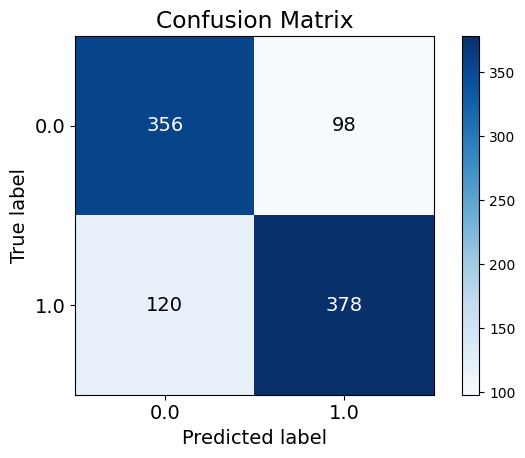

In [78]:
y_pred=best_grid_nb.predict(X_train)
print(confusion_matrix(y_train,y_pred))
skplt.metrics.plot_confusion_matrix(y_train, y_pred);
save_fig('Train Set Confusion Matrix for Multinomial NB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: \n{}".format(classification_report(y_train,y_pred,digits=3)))

### Test Set

[[ 79  28]
 [ 29 102]]


Accuracy Score 0.7605042016806722
Classification report: 
              precision    recall  f1-score   support

         0.0      0.731     0.738     0.735       107
         1.0      0.785     0.779     0.782       131

    accuracy                          0.761       238
   macro avg      0.758     0.758     0.758       238
weighted avg      0.761     0.761     0.761       238



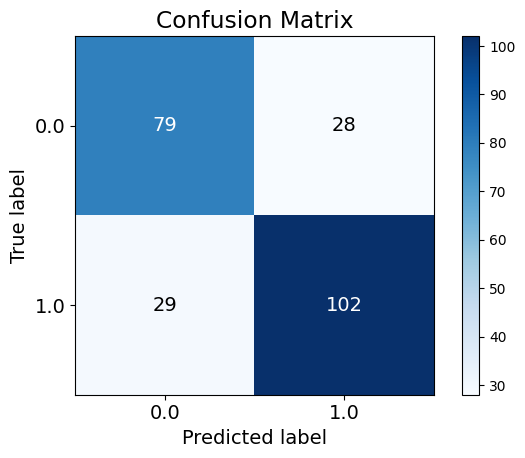

In [79]:

y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Test Set Confusion Matrix for test set MultinomialNB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred,digits=3)))


## ensemble learning

In [80]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard voting classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        #('rf', best_grid_rf),
        #('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty=None, solver='sag')),
                             ('nb', MultinomialNB(alpha=0.01))])

In [84]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr,  best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7899159663865546
DecisionTreeClassifier 0.8403361344537815
LogisticRegression 0.8571428571428571
MultinomialNB 0.7605042016806722
VotingClassifier 0.8487394957983193


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Train Set

Accuracy Score 0.842436974789916
Classification report: 
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       454
         1.0       0.88      0.81      0.84       498

    accuracy                           0.84       952
   macro avg       0.84      0.84      0.84       952
weighted avg       0.85      0.84      0.84       952



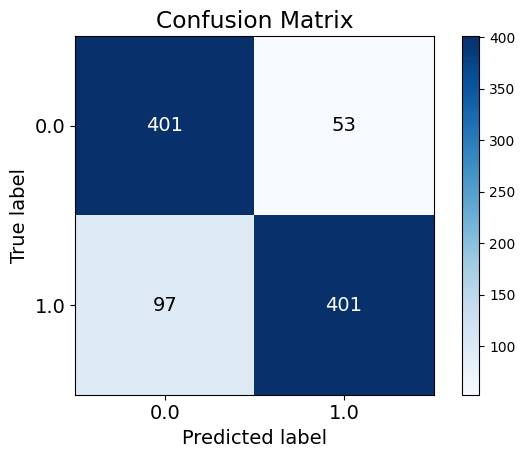

In [85]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train))))

### Test Set

Accuracy Score 0.8487394957983193
Classification report: 
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       107
         1.0       0.89      0.82      0.86       131

    accuracy                           0.85       238
   macro avg       0.85      0.85      0.85       238
weighted avg       0.85      0.85      0.85       238



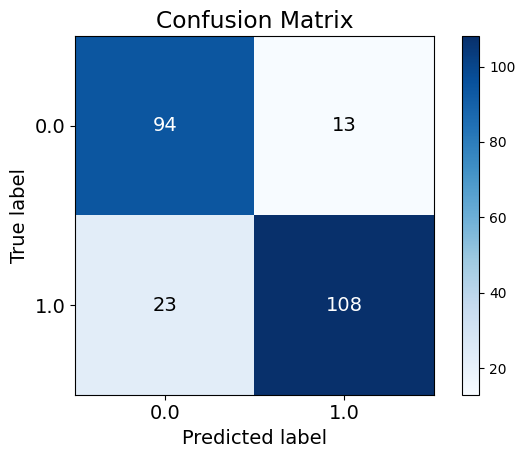

In [86]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [87]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        #('rf', best_grid_rf),
        #('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('dt', DecisionTreeClassifier(max_depth=3)),
                             ('lr',
                              LogisticRegression(penalty=None, solver='sag')),
                             ('nb', MultinomialNB(alpha=0.01))],
                 voting='soft')

In [89]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr,  best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7899159663865546
DecisionTreeClassifier 0.8403361344537815
LogisticRegression 0.8571428571428571
MultinomialNB 0.7605042016806722
VotingClassifier 0.8403361344537815


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Train Set

Accuracy Score 0.842436974789916
Classification report: 
              precision    recall  f1-score   support

         0.0      0.805     0.883     0.842       454
         1.0      0.883     0.805     0.842       498

    accuracy                          0.842       952
   macro avg      0.844     0.844     0.842       952
weighted avg      0.846     0.842     0.842       952



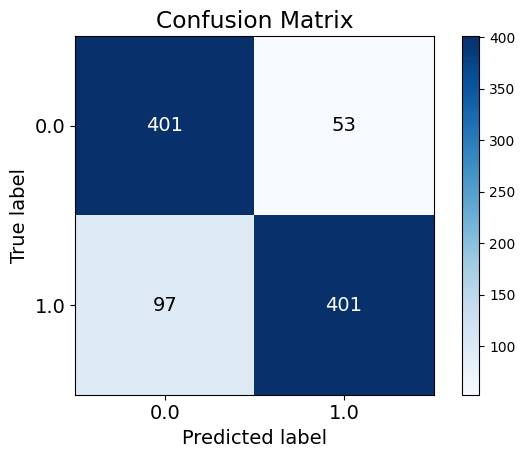

In [90]:
skplt.metrics.plot_confusion_matrix(y_train, hard_voting_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_train, hard_voting_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, hard_voting_clf.predict(X_train),digits=3)))

### Test Set

Accuracy Score 0.8403361344537815
Classification report: 
              precision    recall  f1-score   support

         0.0      0.863     0.766     0.812       107
         1.0      0.825     0.901     0.861       131

    accuracy                          0.840       238
   macro avg      0.844     0.834     0.837       238
weighted avg      0.842     0.840     0.839       238



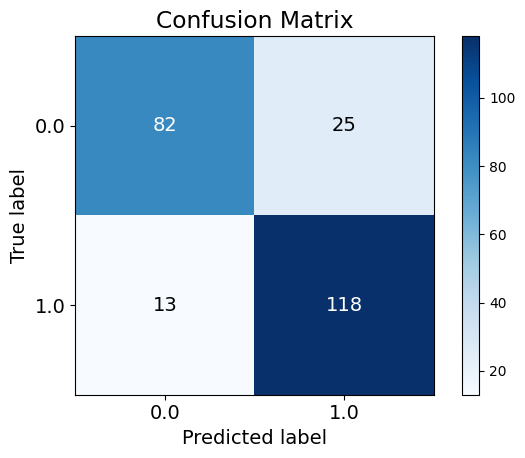

In [91]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test),digits=3)))

## bagging and pasting

In [92]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [93]:
bag_clf = BaggingClassifier(best_grid_dt, n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.8224789915966386
Test Accuracy 0.8613445378151261


Accuracy Score 0.8613445378151261
Classification report: 
              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84       107
         1.0       0.84      0.92      0.88       131

    accuracy                           0.86       238
   macro avg       0.87      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



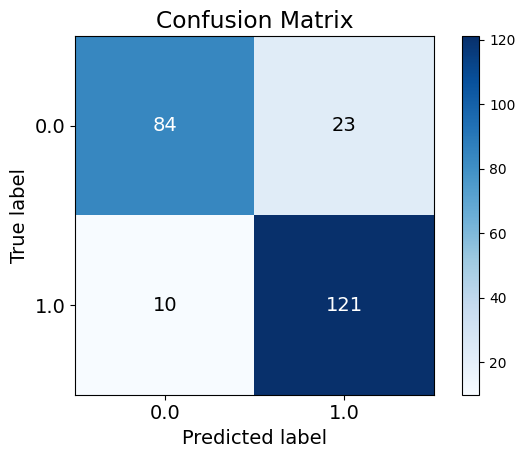

In [94]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q2')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

## impact of no. of estimators

In [95]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.8897058823529411  test acc =  0.8781512605042017 oob =  0.8476890756302521
Num of estimators:  100  train acc =  0.8855042016806722  test acc =  0.8823529411764706 oob =  0.8508403361344538
Num of estimators:  150  train acc =  0.884453781512605  test acc =  0.8739495798319328 oob =  0.8466386554621849
Num of estimators:  200  train acc =  0.8813025210084033  test acc =  0.8781512605042017 oob =  0.8497899159663865
Num of estimators:  250  train acc =  0.884453781512605  test acc =  0.8949579831932774 oob =  0.8476890756302521
Num of estimators:  300  train acc =  0.884453781512605  test acc =  0.8865546218487395 oob =  0.8497899159663865
Num of estimators:  350  train acc =  0.884453781512605  test acc =  0.8823529411764706 oob =  0.851890756302521
Num of estimators:  400  train acc =  0.8834033613445378  test acc =  0.8865546218487395 oob =  0.8550420168067226
Num of estimators:  450  train acc =  0.8855042016806722  test acc =  0.87394957983193

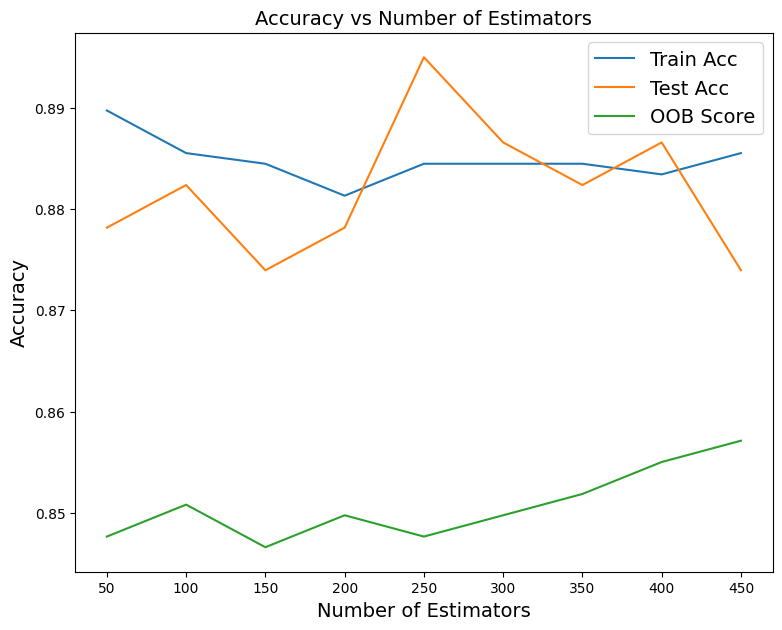

In [96]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [97]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8907563025210085

### Train Set

Accuracy Score 0.8686974789915967
Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       454
         1.0       0.88      0.87      0.87       498

    accuracy                           0.87       952
   macro avg       0.87      0.87      0.87       952
weighted avg       0.87      0.87      0.87       952



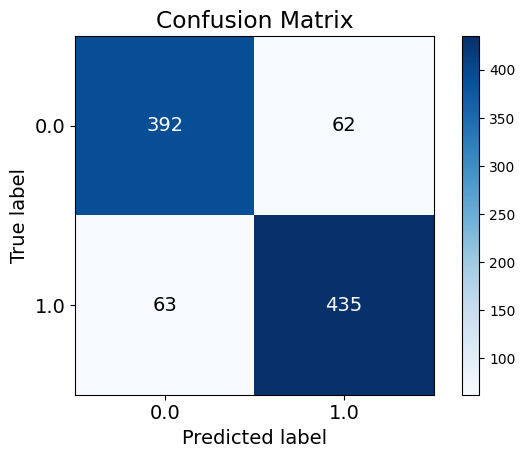

In [98]:
skplt.metrics.plot_confusion_matrix(y_train, ada_clf.predict(X_train));
save_fig('Train Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, ada_clf.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, ada_clf.predict(X_train))))

### Test Set

Accuracy Score 0.8907563025210085
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88       107
         1.0       0.88      0.92      0.90       131

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



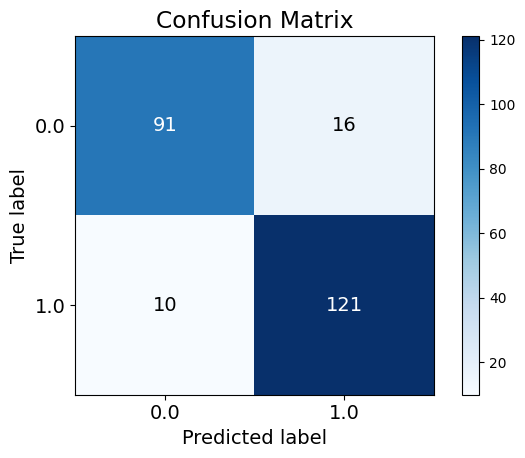

In [99]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Test Set Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [100]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

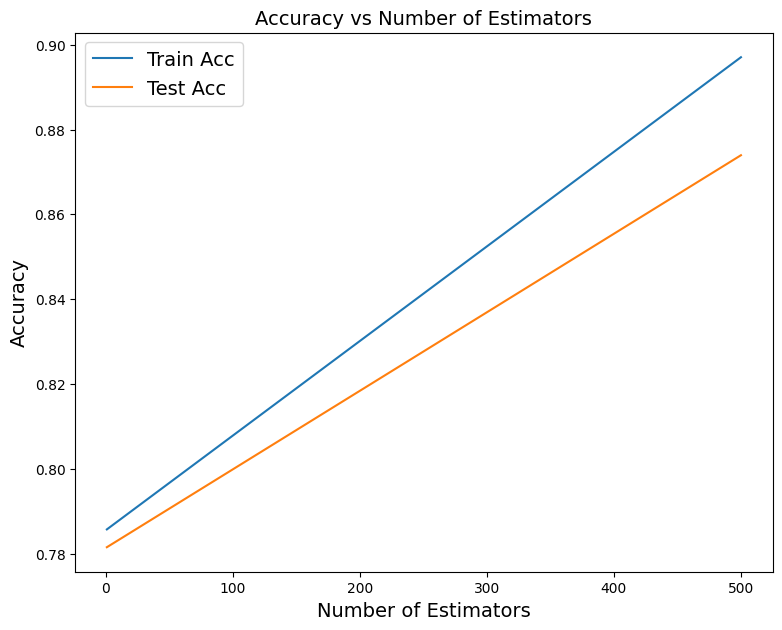

In [101]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

#conda install -c conda-forge xgboost

In [102]:
pip install forge xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [103]:
import xgboost as xgb
print (xgb)

<module 'xgboost' from 'C:\\Users\\Lenovo\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\xgboost\\__init__.py'>


In [104]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.9453781512605042

### Train Set

Accuracy Score 1.0
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       454
         1.0       1.00      1.00      1.00       498

    accuracy                           1.00       952
   macro avg       1.00      1.00      1.00       952
weighted avg       1.00      1.00      1.00       952



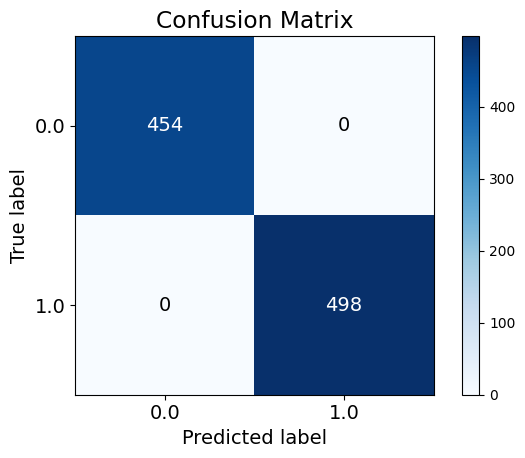

In [105]:
skplt.metrics.plot_confusion_matrix(y_train, xgb_cl.predict(X_train));
save_fig('Train Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_train, xgb_cl.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, xgb_cl.predict(X_train))))

### Test Set

Accuracy Score 0.9453781512605042
Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       107
         1.0       0.93      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.94      0.94       238
weighted avg       0.95      0.95      0.95       238



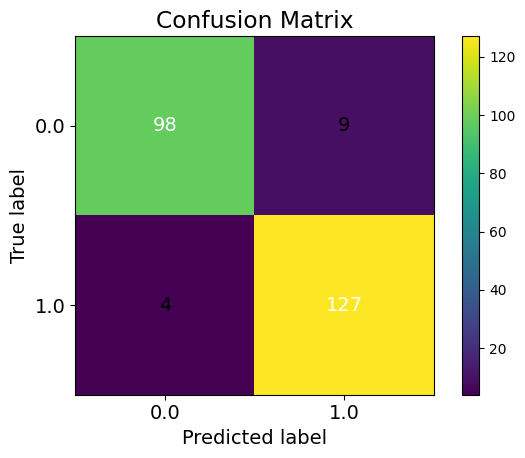

In [106]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test), cmap='viridis');
save_fig('Test Set Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [107]:
#conda install -c conda-forge ds-lime

In [108]:
from lime.lime_tabular import LimeTabularExplainer

ModuleNotFoundError: No module named 'lime'

In [ ]:
feature_names = X_train.columns
#X_train.columns.values.tolist()

In [ ]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [ ]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [ ]:
# Generate explanations using LIME
#Since our accuracy is the highest for Multinomial Naive Bayes, we will be using Multinomial Naive Bayes to interpret 
explanation_lime = explainer.explain_instance(instance, best_grid_rf.predict_proba, num_features=len(feature_names))


In [ ]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_rf.predict_proba([instance]))



In [ ]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

### Feature Importance Plot

In [ ]:
feature_importance = explanation_lime.as_list()

In [ ]:
features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 2/LIME Feature Importance q2.png')
plt.show()


### LIME Explanation Plot

In [ ]:
feature_contributions = explanation_lime.local_exp[1]

In [ ]:
features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 2/LIME Explanation Graph q2.png')
plt.show()

## Explanation for class 1

In [ ]:
#Perform the explanation on the 0th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[0], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[0])
print('Actual: ', y_test[0])
explaination.show_in_notebook(show_table = True, show_all = False)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 1 q2.html')

## Explanation for class 0

In [ ]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_rf.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_rf.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 0 q2.html')

# SHAP

In [ ]:
import shap
import matplotlib.pyplot as plt

# Create a SHAP explainer
explainer = shap.Explainer(best_grid_rf)

# Calculate SHAP values for the entire dataset
shap_values = explainer.shap_values(X_train)  # Replace "X" with your input data

# Select the desired instance for explanation (index 0 in this example)
instance = X_train.iloc[0]  # Replace "X" with your input data

# Calculate the SHAP values for the selected instance
shap_values_instance = explainer.shap_values(instance)

In [ ]:
from shap.plots import beeswarm
beeswarm(explainer(X_train)[:,:,1], show=False)
plt.savefig('images/question 2/beeswarm_plot.png',dpi=300, bbox_inches= 'tight')